# **Smart Predictive Modeling for Rental Property Prices**

***In the real estate industry, determining the appropriate rental price for a property is crucial for property owners, tenants, and property management companies. Accurate rent predictions can
help landlords set competitive prices, tenants make informed rental decisions, and property management companies optimize their portfolio management.***

***The goal of this project is to develop a data-driven model that predicts the rental price of residential properties based on relevant features. By analyzing historical rental data and
property attributes, the model aims to provide accurate and reliable rent predictions.***

## **Importing Necessary Packages**

In [2]:
#importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #Supressing Unnecessary Warnings
warnings.simplefilter('ignore')

## **Importing Dataset**

In [3]:
train_df = pd.read_excel('/content/House_Rent_Train.xlsx')
test_df = pd.read_excel('/content/House_Rent_Test.xlsx')

In [4]:
train_df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test_df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,...,1,2,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,...,7,1,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,...,10,1,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,...,8,1,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,...,0,3,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,2018-10-06 18:22:00,12.941654,77.559999,FAMILY,0,0,0,...,2,2,N,2,3,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,2
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,...,10,1,N,2,2,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,...,10,1,W,1,2,3,"{""SC"":false,""INTERCOM"":false,""AC"":false,""PB"":f...",CORP_BORE,IH,0
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,...,1,3,N,4,10,10,"{""SC"":false,""INTERCOM"":true,""AC"":false,""PB"":tr...",BOREWELL,AP,3


## **Data Preprocessing**

In [6]:
train_df.head(50)


,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
5,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,...,2.0,E,1.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0
6,ff808181647d728001647e3cd0ed458d,BHK3,"Narayanappa Garden,Whitefield",2018-12-07 20:29:00,12.967144,77.750662,ANYONE,1,1,1,...,3.0,NE,5.0,3.0,9.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":t...",CORPORATION,AP,3.0,32000.0
7,ff80818164e9cd1b0164ea07d09114b7,BHK2,HSR Layout 5th Sector,30-07-2018 16:01,12.917414,77.631764,ANYONE,0,0,0,...,2.0,S,2.0,0.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORP_BORE,IH,0.0,22000.0
8,ff808181624e0deb01624e6b3426131c,BHK2,Banashankari,26-03-2018 14:11,12.923301,77.556324,ANYONE,0,0,0,...,2.0,S,2.0,0.0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,0.0,10000.0
9,ff808181620eb61601620f1b79a42734,BHK2,Whitefield,2018-10-03 17:17:00,12.972697,77.751880,ANYONE,1,1,0,...,2.0,E,4.0,2.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,19500.0


In [7]:
train_df.shape

(20555, 25)

In [9]:
#Basic_info_&_Datatype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4500 non-null   object 
 1   type             4500 non-null   object 
 2   locality         4500 non-null   object 
 3   activation_date  4500 non-null   object 
 4   latitude         4500 non-null   float64
 5   longitude        4500 non-null   float64
 6   lease_type       4500 non-null   object 
 7   gym              4500 non-null   int64  
 8   lift             4500 non-null   int64  
 9   swimming_pool    4500 non-null   int64  
 10  negotiable       4500 non-null   int64  
 11  furnishing       4500 non-null   object 
 12  parking          4500 non-null   object 
 13  property_size    4500 non-null   int64  
 14  property_age     4500 non-null   int64  
 15  bathroom         4500 non-null   int64  
 16  facing           4500 non-null   object 
 17  cup_board     

In [10]:
#Check if missing values
train_df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [11]:
#Handling Missing Values
train_df = train_df.dropna()

In [12]:
train_df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [13]:
train_df.isna().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [15]:
#Basic_Stats
train_df.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000
mean,12.945750,77.637238,0.226235,0.361142,0.174461,0.711488,1061.437209,5.777053,1.857732,4.567503,1.869510,3.798106,1.147863,19048.502969
std,0.029587,0.110758,0.418404,0.480344,0.379515,0.453081,591.857798,6.362450,0.710933,336.427053,2.181633,3.183849,0.993290,8433.444157
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,12.918232,77.571912,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,12.943792,77.633367,0.000000,0.000000,0.000000,1.000000,1044.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,12.970922,77.695692,0.000000,1.000000,0.000000,1.000000,1280.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


In [16]:
#Datatype_Conversion

columns_to_convert = ['rent', 'bathroom', 'floor', 'balconies', 'cup_board', 'total_floor']
desired_dtype = 'int64'

train_df[columns_to_convert] = train_df[columns_to_convert].astype(desired_dtype)



In [17]:
train_df['property_age'] = train_df['property_age'].astype('int64')


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20377 entries, 1 to 20531
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20377 non-null  object 
 1   type             20377 non-null  object 
 2   locality         20377 non-null  object 
 3   activation_date  20377 non-null  object 
 4   latitude         20377 non-null  float64
 5   longitude        20377 non-null  float64
 6   lease_type       20377 non-null  object 
 7   gym              20377 non-null  int64  
 8   lift             20377 non-null  int64  
 9   swimming_pool    20377 non-null  int64  
 10  negotiable       20377 non-null  int64  
 11  furnishing       20377 non-null  object 
 12  parking          20377 non-null  object 
 13  property_size    20377 non-null  int64  
 14  property_age     20377 non-null  int64  
 15  bathroom         20377 non-null  int64  
 16  facing           20377 non-null  object 
 17  cup_board   

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4500 non-null   object 
 1   type             4500 non-null   object 
 2   locality         4500 non-null   object 
 3   activation_date  4500 non-null   object 
 4   latitude         4500 non-null   float64
 5   longitude        4500 non-null   float64
 6   lease_type       4500 non-null   object 
 7   gym              4500 non-null   int64  
 8   lift             4500 non-null   int64  
 9   swimming_pool    4500 non-null   int64  
 10  negotiable       4500 non-null   int64  
 11  furnishing       4500 non-null   object 
 12  parking          4500 non-null   object 
 13  property_size    4500 non-null   int64  
 14  property_age     4500 non-null   int64  
 15  bathroom         4500 non-null   int64  
 16  facing           4500 non-null   object 
 17  cup_board     

In [20]:
train_df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2,NE,2,3,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2,22000
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3,E,3,1,5,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3,28000
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1,E,1,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0,8000
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3,E,4,0,0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1,45000
5,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,...,2,E,1,3,5,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2,18000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,ff80818159ded60e0159dfff948e5bcb,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,...,2,E,1,1,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1,20000
20528,ff8081815e73c2e2015e74ac10e91975,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,...,2,N,2,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2,30000
20529,ff8081816073f28c016077bb8db47e4f,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,...,2,W,2,5,5,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2,16000
20530,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,...,2,E,2,2,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3,30000


In [21]:
column_data = train_df['amenities']
print(column_data)


1        {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
2        {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
3        {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
4        {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
5        {"LIFT":true,"GYM":true,"INTERNET":false,"AC":...
                               ...                        
20524    {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...
20528    {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
20529    {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...
20530    {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...
20531    {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
Name: amenities, Length: 20377, dtype: object


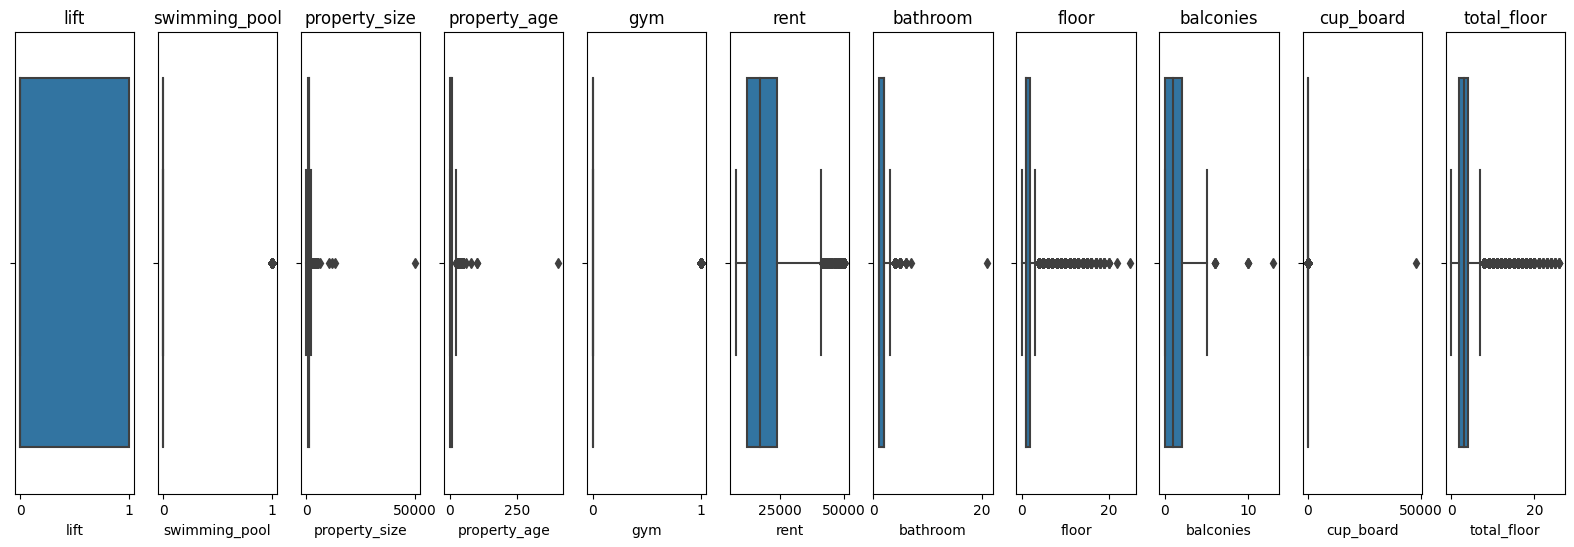

In [23]:
#OUTLIERS_CHECKING
#OUTLIERS_HANDLING

import seaborn as sns
import matplotlib.pyplot as plt


columns_to_plot = ['lift','swimming_pool','property_size','property_age','gym','rent', 'bathroom', 'floor', 'balconies', 'cup_board', 'total_floor']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 6))

# Create boxplots for each column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=train_df[column], ax=axes[i])
    axes[i].set_title(column)

plt.show()


In [24]:
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

latitude             0.052691
longitude            0.123780
gym                  0.000000
lift                 1.000000
swimming_pool        0.000000
negotiable           1.000000
property_size      580.000000
property_age         9.000000
bathroom             1.000000
cup_board            2.000000
floor                1.000000
total_floor          2.000000
balconies            2.000000
rent             11500.000000
dtype: float64


In [25]:
threshold = 1.5 * IQR
outliers = train_df[(train_df < Q1 - threshold) | (train_df > Q3 + threshold)]
outliers

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,80.262012,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
20530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#Removal_Of_Outliers
train_df_no_outliers = train_df[~((train_df < Q1 - threshold) | (train_df > Q3 + threshold)).any(axis=1)]

In [27]:
train_df_no_outliers

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2,NE,2,3,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2,22000
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1,E,1,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0,8000
7,ff80818164e9cd1b0164ea07d09114b7,BHK2,HSR Layout 5th Sector,30-07-2018 16:01,12.917414,77.631764,ANYONE,0,0,0,...,2,S,2,0,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORP_BORE,IH,0,22000
8,ff808181624e0deb01624e6b3426131c,BHK2,Banashankari,26-03-2018 14:11,12.923301,77.556324,ANYONE,0,0,0,...,2,S,2,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,0,10000
10,ff8081815c116660015c119a34fd0829,BHK2,RR Nagar,2017-11-07 14:58:00,12.912039,77.510950,FAMILY,0,0,0,...,2,E,4,1,2,"{""AC"":false,""CLUB"":false,""CPA"":false,""FS"":fals...",CORPORATION,IF,1,12500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20521,ff8081816451a4760164544ab2eb4943,BHK1,Bellandur,2018-03-07 14:32:00,12.926303,77.675278,FAMILY,0,1,0,...,1,N,1,1,5,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,1,15000
20522,ff8081814e322687014e343219020f1b,BHK2,Bommanahalli,2018-12-04 12:53:00,12.904039,77.627142,FAMILY,0,0,0,...,2,E,2,1,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1,13500
20528,ff8081815e73c2e2015e74ac10e91975,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,...,2,N,2,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2,30000
20530,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,...,2,E,2,2,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3,30000


# **EDA**

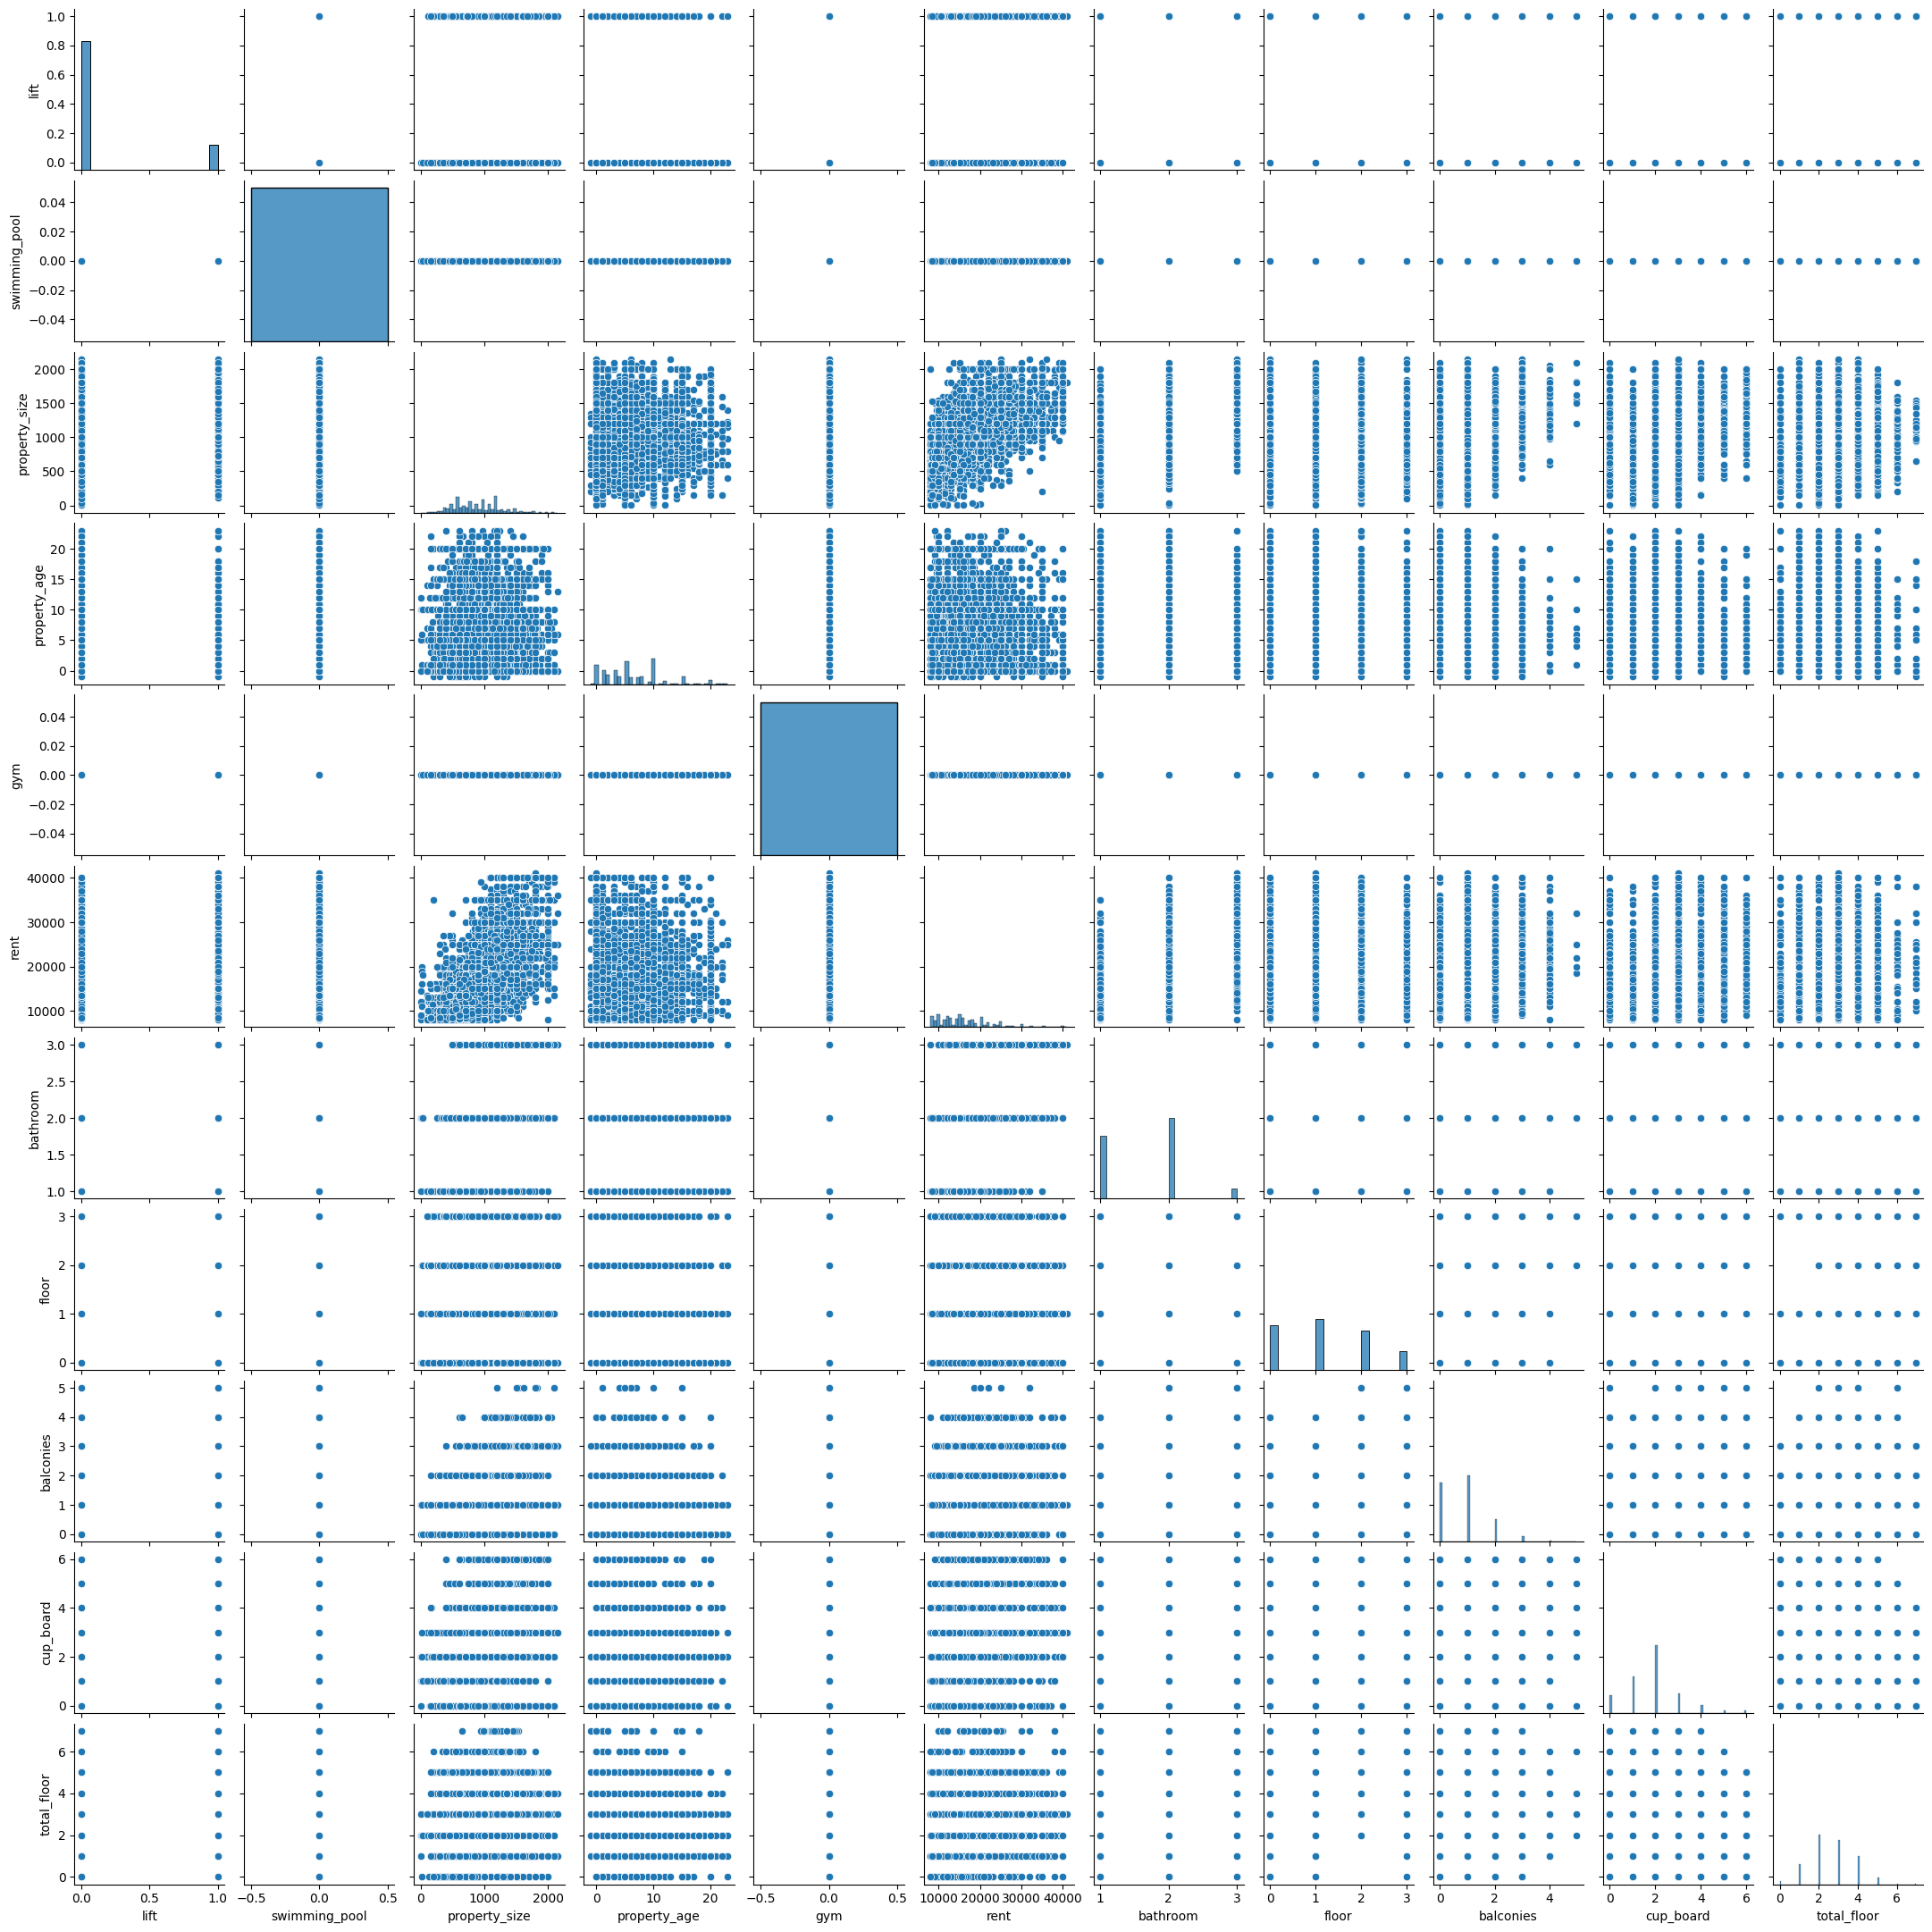

In [28]:
selected_columns = ['lift', 'swimming_pool', 'property_size', 'property_age', 'gym', 'rent', 'bathroom', 'floor', 'balconies', 'cup_board', 'total_floor']
sns.pairplot(train_df_no_outliers[selected_columns], height=2)
plt.show()

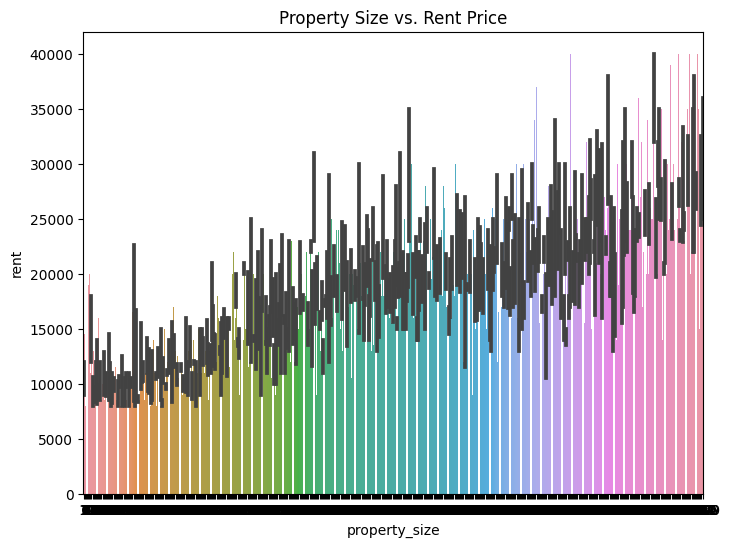

In [29]:
#Univariate Analysis

plt.figure(figsize=(8, 6))
sns.barplot(x='property_size', y='rent', data=train_df_no_outliers)
plt.title('Property Size vs. Rent Price')
plt.show()

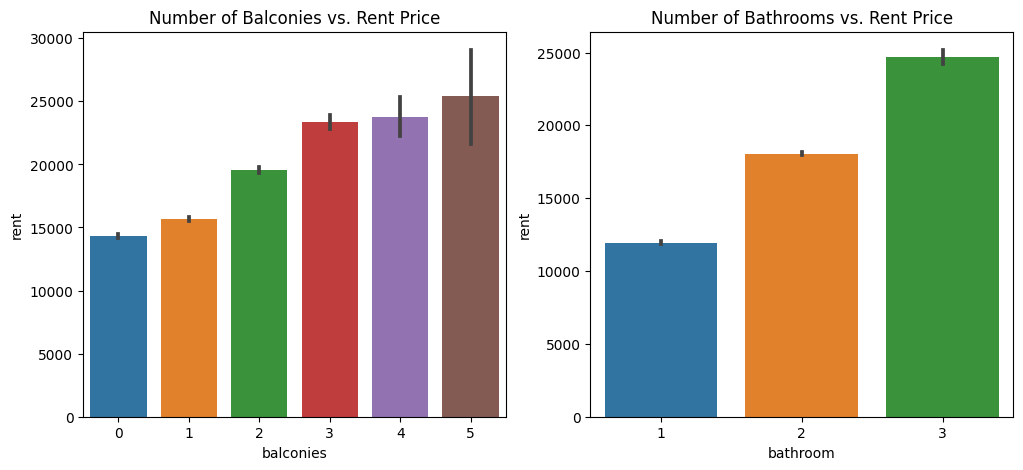

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='balconies', y='rent', data=train_df_no_outliers)
plt.title('Number of Balconies vs. Rent Price')

plt.subplot(1, 2, 2)
sns.barplot(x='bathroom', y='rent', data=train_df_no_outliers)
plt.title('Number of Bathrooms vs. Rent Price')
plt.show()

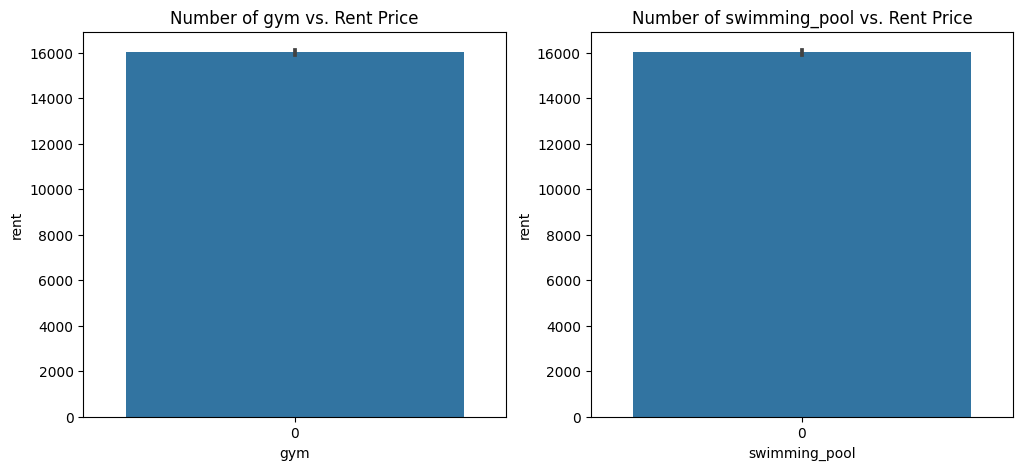

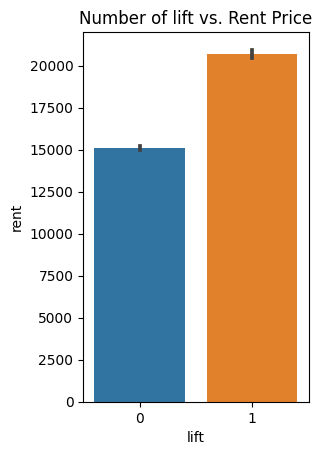

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='gym', y='rent', data=train_df_no_outliers)
plt.title('Number of gym vs. Rent Price')

plt.subplot(1, 2, 2)
sns.barplot(x='swimming_pool', y='rent', data=train_df_no_outliers)
plt.title('Number of swimming_pool vs. Rent Price')
plt.show()

plt.subplot(1, 2, 1)
sns.barplot(x='lift', y='rent', data=train_df_no_outliers)
plt.title('Number of lift vs. Rent Price')
plt.show()


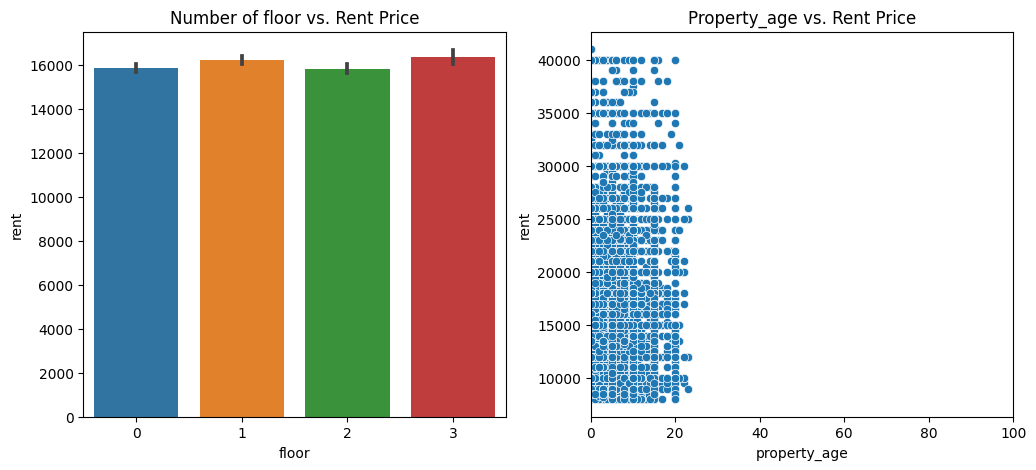

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='floor', y='rent', data=train_df_no_outliers)
plt.title('Number of floor vs. Rent Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='property_age', y='rent', data=train_df_no_outliers)
plt.title('Property_age vs. Rent Price')
plt.xlim(0, 100)
plt.show()

## **CORRELATION**

In [33]:
# Calculate the correlation matrix
train_corr = train_df_no_outliers.corr()

In [34]:
train_corr

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
latitude,1.000000,0.249989,NaN,-0.016704,NaN,-0.014898,0.008819,0.049180,-0.019370,-0.003042,-0.005037,-0.012229,0.029150,0.044266
longitude,0.249989,1.000000,NaN,0.076388,NaN,-0.043568,-0.052661,-0.156588,-0.039090,-0.013833,0.089839,0.202292,0.101751,0.106913
gym,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lift,-0.016704,0.076388,NaN,1.000000,NaN,0.004816,0.312266,-0.058606,0.283543,0.241421,0.205550,0.501021,0.412649,0.332714
swimming_pool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negotiable,-0.014898,-0.043568,NaN,0.004816,NaN,1.000000,0.076284,0.058689,0.064816,0.055177,-0.036206,-0.026380,0.022735,0.086284
property_size,0.008819,-0.052661,NaN,0.312266,NaN,0.076284,1.000000,0.095559,0.688910,0.479495,-0.052535,0.082394,0.384457,0.682507
property_age,0.049180,-0.156588,NaN,-0.058606,NaN,0.058689,0.095559,1.000000,0.034918,0.037793,-0.183662,-0.254299,-0.031400,0.093500
bathroom,-0.019370,-0.039090,NaN,0.283543,NaN,0.064816,0.688910,0.034918,1.000000,0.451565,-0.022745,0.105435,0.319963,0.603958
cup_board,-0.003042,-0.013833,NaN,0.241421,NaN,0.055177,0.479495,0.037793,0.451565,1.000000,0.016220,0.113206,0.275871,0.447755


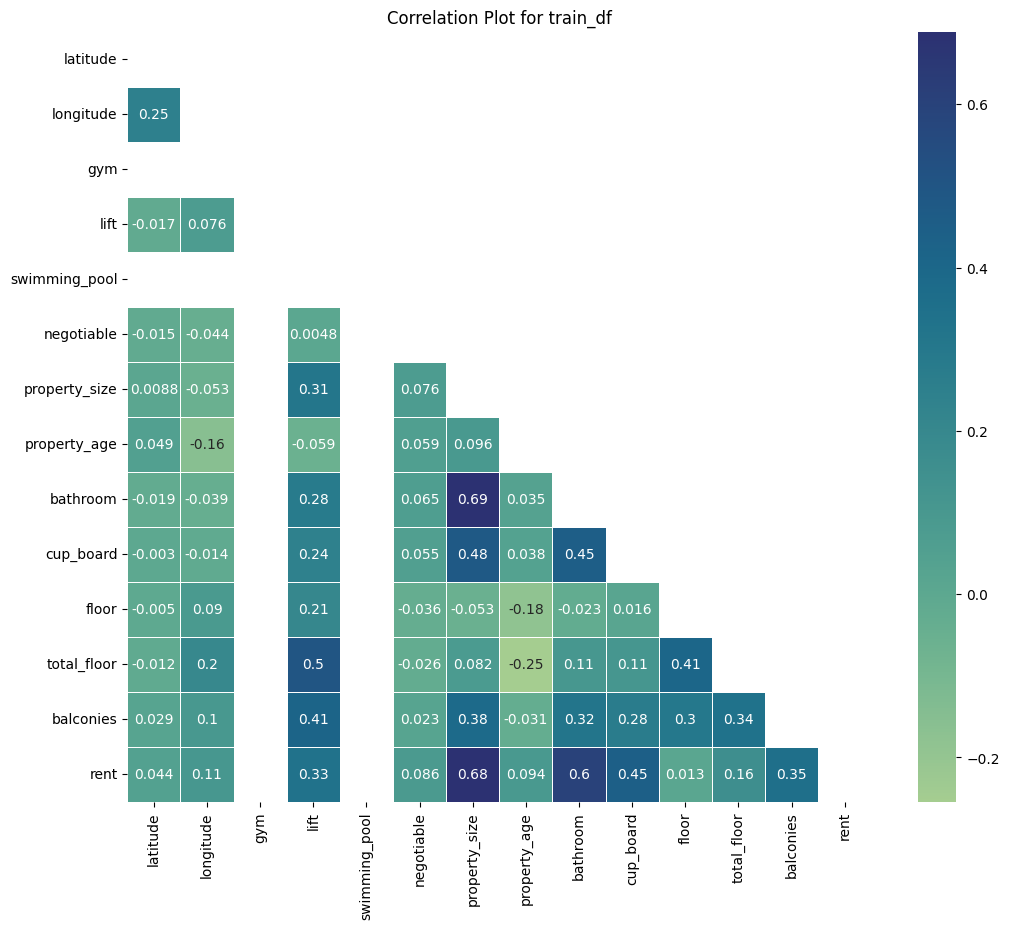

In [35]:
#HEATMAP

plt.figure(figsize=(12, 10))

# Create a mask to hide the upper triangle for better readability
mask = np.triu(np.ones_like(train_corr))

# Create a heatmap using Seaborn
sns.heatmap(train_corr, annot=True, cmap="crest", linewidth=.5, mask=mask)

# Set the title of the plot
plt.title('Correlation Plot for train_df')

# Display the plot
plt.show()

### **Feature Selection and Engineering**

In [46]:
# Selecting columns for X_train1 as per the correlation and most affecting

X_train1 = train_df_no_outliers[['latitude', 'longitude', 'lift', 'property_size', 'property_age', 'bathroom', 'floor', 'balconies', 'cup_board', 'total_floor', 'negotiable']]
y_train1 = train_df_no_outliers['rent']

# Selecting columns for X_test1
X_test1 = test_df[['latitude', 'longitude', 'lift', 'property_size', 'property_age', 'bathroom', 'floor', 'balconies', 'cup_board', 'total_floor', 'negotiable']]


## **Model Selection,Training and Evaluation**

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [48]:
#Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train1, y_train1)

LinearRegression()

In [50]:
lr_predictions_train = lr_model.predict(X_train1)

In [51]:
lr_predictions_train

array([22855.95503157,  9984.62515054, 17718.59268581, ...,
       18200.57114695, 19336.92901147,  9856.91617137])

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr_mse = mean_squared_error(y_train1, lr_predictions_train)
lr_mae = mean_absolute_error(y_train1, lr_predictions_train)
print(f"Linear Regression MSE: {lr_mse}, MAE: {lr_mae}")


Linear Regression MSE: 17410462.45528367, MAE: 3095.4784204354396


In [55]:
#TESTING ON Test_Dataset

lr_predictions_test = lr_model.predict(X_test1)

In [58]:
lr_predictions_test

array([19626.80809776, 11544.01059885, 12084.05256795, ...,
       12394.69763067, 28432.79086558, 29824.57360718])

In [ ]:
test_predictions_df = pd.DataFrame({'Predicted Rent': lr_predictions_test})

#Concatenate this DataFrame with the original test_df to have a side-by-side comparison
result_df = pd.concat([test_df, test_predictions_df], axis=1)


In [61]:
result_df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,Predicted Rent
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,...,2,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1,19626.808098
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,...,1,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0,11544.010599
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,...,1,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0,12084.052568
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,...,1,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0,9429.942436
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,...,3,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1,26191.101120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,2018-10-06 18:22:00,12.941654,77.559999,FAMILY,0,0,0,...,2,N,2,3,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,2,16418.047970
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,...,1,N,2,2,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1,13592.630473
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,...,1,W,1,2,3,"{""SC"":false,""INTERCOM"":false,""AC"":false,""PB"":f...",CORP_BORE,IH,0,12394.697631
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,...,3,N,4,10,10,"{""SC"":false,""INTERCOM"":true,""AC"":false,""PB"":tr...",BOREWELL,AP,3,28432.790866


## **Now For RF And GB Regressor**

In [63]:
#Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train1, y_train1)

#Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train1, y_train1)

GradientBoostingRegressor()

In [64]:
rf_predictions_train = rf_model.predict(X_train1)
gb_predictions_train = gb_model.predict(X_train1)

In [65]:
rf_predictions_train

array([23390.,  8355., 21115., ..., 29465., 29755.,  8565.])

In [66]:
gb_predictions_train

array([22894.33185866, 10001.8515229 , 19573.42762693, ...,
       20917.0863141 , 24414.82240406, 10898.93166484])

In [67]:
rf_mse = mean_squared_error(y_train1, rf_predictions_train)
rf_mae = mean_absolute_error(y_train, rf_predictions_train)
print(f"Random Forest Regressor MSE: {rf_mse}, MAE: {rf_mae}")

Random Forest Regressor MSE: 1578382.7157223064, MAE: 903.272474121592


In [68]:
gb_mse = mean_squared_error(y_train1, gb_predictions_train)
gb_mae = mean_absolute_error(y_train1, gb_predictions_train)
print(f"Gradient Boosting Regressor MSE: {gb_mse}, MAE: {gb_mae}")

Gradient Boosting Regressor MSE: 10993119.974052312, MAE: 2446.4626616750115


In [69]:
#Trying Out on Test_Dataset

rf_predictions_test = rf_model.predict(X_test1)
gb_predictions_test = gb_model.predict(X_test1)

In [70]:
rf_predictions_test

array([25730. , 11820. , 13287.5, ..., 10451. , 22995. , 23390. ])

In [71]:
gb_predictions_test

array([24078.6510137 , 11984.74164969, 10783.713337  , ...,
       10440.95882979, 26331.69119536, 25959.49272011])

In [72]:
test_predictions_df1 = pd.DataFrame({'Predicted Rent rf': rf_predictions_test})
test_predictions_df2 = pd.DataFrame({'Predicted Rent gb': gb_predictions_test})

#Concatenate this DataFrame with the original test_df to have a side-by-side comparison
result_df1 = pd.concat([test_df, test_predictions_df1,test_predictions_df2], axis=1)


In [73]:
result_df1

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,Predicted Rent rf,Predicted Rent gb
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,...,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1,25730.0,24078.651014
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,...,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0,11820.0,11984.741650
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,...,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0,13287.5,10783.713337
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,...,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0,10575.0,10681.717913
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,...,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1,23300.0,24520.932565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,2018-10-06 18:22:00,12.941654,77.559999,FAMILY,0,0,0,...,N,2,3,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,2,17807.5,16973.343664
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,...,N,2,2,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1,15000.0,14791.092189
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,...,W,1,2,3,"{""SC"":false,""INTERCOM"":false,""AC"":false,""PB"":f...",CORP_BORE,IH,0,10451.0,10440.958830
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,...,N,4,10,10,"{""SC"":false,""INTERCOM"":true,""AC"":false,""PB"":tr...",BOREWELL,AP,3,22995.0,26331.691195


## **Hyperparameter Tuning**

In [74]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train1, y_train1)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_


In [77]:
best_score = grid_search.best_score_

In [75]:
best_params

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

In [76]:
best_rf_model

RandomForestRegressor(max_depth=20)

In [79]:
#GridSearchCV will try to maximize the negative MSE, which is equivalent to minimizing the MSE.
best_score

-11390928.365330782

## **SUMMARY**

### **The results and evaluation metrics show that RF Regressor was the most powerful prediction model than other both models as we predicted on both the datasets and accordingly compared.**